In [1]:
 """
Use to be able to retrieve modules and import in core and app directorie
"""
from os import sys, path
sys.path.append(path.dirname(path.dirname(path.abspath("__file__"))))
print(sys.path)

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src']


In [2]:
import glob
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import pyat.core.XSF.XSFConstants as XConstants
import stage.DirectorySettings as directories
from stage.Export_Geotiff import Export_File
from stage.NCFileCache import XSFFile
from stage.InsonifiedAreaComputer import InsonifiedAreaComputer

warnings.filterwarnings('ignore')

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src', 'C:\\Users\\krodrigu\\Desktop\\Stage_K

In [3]:
file_names = glob.glob(directories.input_directory + "/backscatter/boite1/*.xsf")
now = datetime.datetime.now()
# Récupère les données du XSF
files = []
for file_name in file_names:
    if "0047_20180914_222017_ShipName" not in file_name:
        files.append(XSFFile(file_name))

file = []
file.append(XSFFile(file_names[0]))
single_file = [
    value
    for value in files
    if value.file_name.find("0032_20180914_183119_ShipName") > 0
]
single_file = single_file[0]

filename_insonified_area = path.join(
    directories.output_dir,
    "insonified_area_dB_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

In [4]:
mnt_filename = "C:/Users/krodrigu/Documents/pyat/2019_10_30_13_12_32.tif"
filename_incidence = "C:/Users/krodrigu/Documents/pyat/incidence_angle_2019_11_25_15_37_59.tif"

In [5]:
insonified_computed = InsonifiedAreaComputer(None, files, directories.output_dir)
x, y, cache, insonified_area = insonified_computed.compute_insonified_area(single_file, filename_incidence)

Computing bounding box
define metric projection
Use projection : +proj=utm +zone=30+ellps=WGS84 +datum=WGS84 +units=m +no_defs
Computed UTM detection projection for file  W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf
Computed UTM detection projection for file  W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf
end computing insonified area for file W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf


In [6]:
export_to_geotiff = Export_File()
export_to_geotiff.xsf_toTIFF(filename_insonified_area, x, y, insonified_area, cache)

writing file C:/Users/krodrigu/Documents/pyat/insonified_area_dB_2019_11_26_14_45_31.tif


Mean :  -0.91421604
Max :  7.532474
Min :  -4.436884
Median :  -1.4057095
Std :  1.8824096
                                      Insonified Area computed                                      


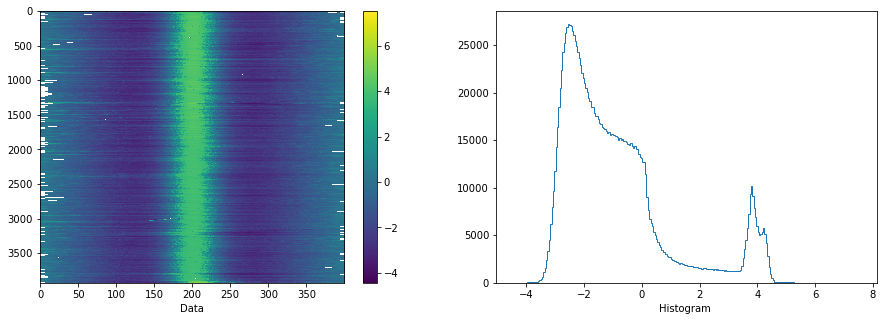

In [7]:
scope.display_geotiff_data(filename_insonified_area, "Insonified Area computed", True)

In [8]:
detection_backscatter = single_file.get_as_detection_masked_array(XConstants.RootGrp.SonarGrp.BeamGroup1Grp.BathymetryGrp.DETECTION_BACKSCATTER)
kongsberg_area, ifremer_area = insonified_computed.kongsberg_area, insonified_computed.ifremer_area
echo = detection_backscatter - kongsberg_area + ifremer_area
echo = echo.filled(np.nan)

In [9]:
filename_reflectivity = path.join(
    directories.output_dir,
    "reflectivity_dB_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)
export_to_geotiff.xsf_toTIFF(filename_reflectivity, x, y, echo, cache)

writing file C:/Users/krodrigu/Documents/pyat/reflectivity_dB_2019_11_26_14_45_31.tif


Mean :  -15.346476
Max :  9.236898
Min :  -52.16073
Median :  -15.393222
Std :  4.4999847
                                             Echo Level                                             


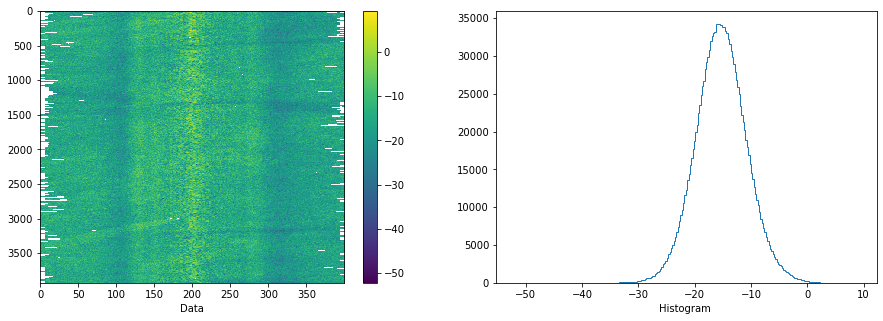

In [10]:
scope.display_geotiff_data(filename_reflectivity, "Echo Level", True)